# Calibrate PMLV2 model using FLUXNET data
> US Twt (CRO, 2009)

In [1]:
using PML, Ipaper

In [2]:
df_out, df, par = deserialize(file_FLUXNET_CRO)
df.GPP_obs = df.GPPobs
df.ET_obs = df.ETobs

275-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
   1.60968225909663
   1.27912555152687
   1.06059787751179
   0.779535860816098
   0.578394230978662
   0.332647468807178
   0.50089104654852
   1.26067990507329
   1.35241601110533

## 模型参数率定

In [3]:
theta, goal, flag = model_calib(df, par0)
df_out = PMLV2_sites(df; par=theta2par(theta))
df_out[1:10, :]

Iteration =   0, nEvals = 125, Best Cost = -0.54442
Iteration =   1, nEvals = 310, Best Cost = -0.55286
Iteration =   2, nEvals = 541, Best Cost = -0.55286
Iteration =   3, nEvals = 764, Best Cost = -0.57452
Iteration =   4, nEvals = 1002, Best Cost = -0.57452
Iteration =   5, nEvals = 1232, Best Cost = -0.57779
Iteration =   6, nEvals = 1459, Best Cost = -0.57779
Iteration =   7, nEvals = 1684, Best Cost = -0.58743
Iteration =   8, nEvals = 1905, Best Cost = -0.58743
Iteration =   9, nEvals = 2127, Best Cost = -0.59525
Iteration =  10, nEvals = 2335, Best Cost = -0.59610
Iteration =  11, nEvals = 2548, Best Cost = -0.59946


Row,ET,GPP,Ec,Ecr,Eca,Ei,Pi,Es_eq,Eeq,ET_water,Ga,Gc_w,fval_soil,Es
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.377336,0.575367,0.125056,0.000475684,0.12458,0.0153008,0.313699,0.236979,0.290767,0.858128,0.205296,0.000920679,1.0,0.236979
2,0.624778,1.16619,0.449481,0.00136488,0.448116,0.0,0.0,0.270274,0.369115,1.62322,0.23079,0.00150026,0.648591,0.175297
3,0.84121,1.1642,0.371328,0.00467123,0.366657,0.0893813,0.877869,0.380501,0.577062,1.31431,0.151401,0.00166188,1.0,0.380501
4,1.18195,2.03292,0.723286,0.00764317,0.715643,0.0168142,0.130936,0.441846,0.742396,1.85276,0.218196,0.0027221,1.0,0.441846
5,1.43795,2.17051,0.726299,0.0121183,0.714181,0.256732,1.65602,0.454915,0.844851,1.77516,0.209421,0.0030483,1.0,0.454915
6,1.42968,1.86279,0.348622,0.00634529,0.342277,0.713043,7.99746,0.368012,0.753677,1.41162,0.381561,0.00311744,1.0,0.368012
7,1.81329,2.82259,0.758802,0.023712,0.73509,0.578831,2.99217,0.475655,1.07171,1.78593,0.233744,0.0043008,1.0,0.475655
8,1.90462,3.09889,0.743111,0.0272577,0.715853,0.721066,4.22193,0.440448,1.10582,1.75303,0.257892,0.00490927,1.0,0.440448
9,2.45313,5.43425,1.76828,0.0966887,1.67159,0.00180662,0.00669338,0.683043,1.90623,2.80477,0.18715,0.00759875,1.0,0.683043


## 拟合优度

In [4]:
gof = [
  (; var="ET", GOF(df.ET_obs, df_out.ET)...),
  (; var="GPP", GOF(df.GPP_obs, df_out.GPP)...)] |> DataFrame
DataFrame(gof)

Row,var,NSE,R2,KGE,R,RMSE,MAE,bias,bias_perc,n_valid
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,ET,0.663915,0.664915,0.759815,0.815423,1.25573,0.887616,-0.0139188,-0.463569,263
2,GPP,0.535,0.61344,0.46745,0.783224,3.33344,2.65305,1.02043,27.1677,260


## 绘图

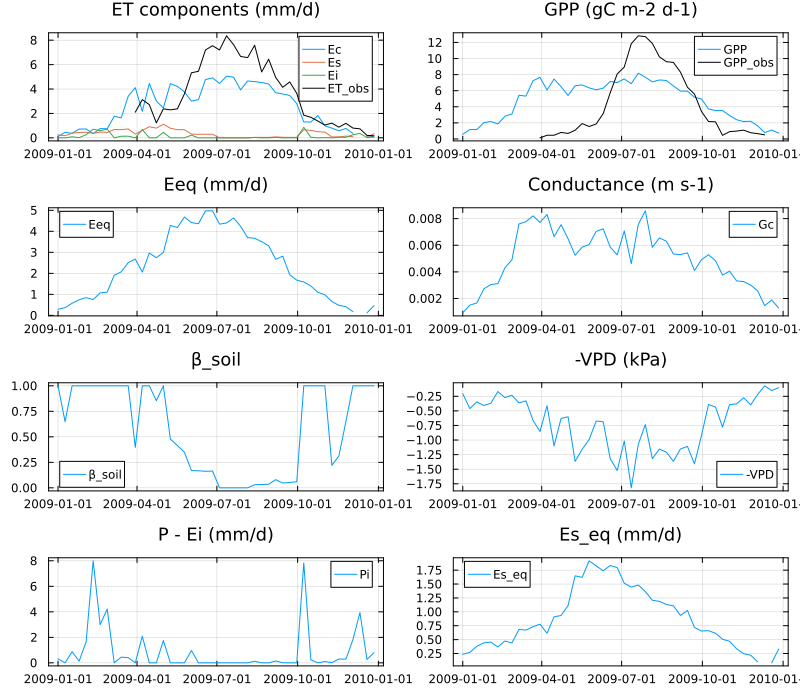

In [5]:
using Plots
gr(framestyle=:box, titlefontsize=12)
t = df.date
inds = 1:46*1

function plot_var(var; label=string(var), title=string(var),
  data=df_out, scale=1, kw...)
  plot(t[inds], data[inds, var] * scale; label, title, kw...)
end
function plot_var!(p, var; label=string(var),
  data=df_out, kw...)
  plot!(p, t[inds], data[inds, var]; label, kw...)
end

p_et = plot(title="ET components (mm/d)")
plot_var!(p_et, :Ec)
plot_var!(p_et, :Es)
plot_var!(p_et, :Ei)
plot_var!(p_et, :ETobs; data=df, label="ET_obs", color=:black)

p_gpp = plot_var(:GPP; title="GPP (gC m-2 d-1)", label="GPP")
plot_var!(p_gpp, :GPPobs; data=df, label="GPP_obs", color=:black)

plot(
  p_et, p_gpp,
  plot_var(:Eeq; title="Eeq (mm/d)", label="Eeq"),
  plot_var(:Gc_w; title="Conductance (m s-1)", label="Gc"),
  plot_var(:fval_soil; title="β_soil", label="β_soil"),
  plot_var(:VPD; data=df, scale=-1, title="-VPD (kPa)", label="-VPD"),
  plot_var(:Pi; title="P - Ei (mm/d)"),
  plot_var(:Es_eq; title="Es_eq (mm/d)"),
  size=(800, 700),
  layout=(4, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*